<a href="https://colab.research.google.com/github/sai-teja-ponugoti/ECE-657A-Machine-Learning/blob/master/Assignment3/A3_Part2_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN PART**

In [0]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns
import random
import keras
%matplotlib inline
sns.set_style("whitegrid")
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

In [0]:
# !pip install -q kaggle
# from google.colab import files
# uploaded = files.upload()
# !kaggle competitions download -c ece-657a-w20-asg3-part-1
from google.colab import files
import io
uploaded = files.upload()

!pip install -q kaggle

# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

# Next, install the Kaggle API client.
!pip install -q kaggle

# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

# !kaggle datasets download -d bharath150/minidata

# !unzip minidata.zip

!kaggle competitions download -c ece657a-w20-asg3-part2

!unzip train.csv.zip

!unzip testX.csv.zip

# train = pd.read_csv("../input/train.csv")
# test = pd.read_csv("../input/test.csv")

Saving kaggle.json to kaggle.json
-rw-r--r-- 1 root root 71 Apr 21 21:43 kaggle.json
 83% 28.0M/33.7M [00:00<00:00, 39.4MB/s]
100% 33.7M/33.7M [00:00<00:00, 76.0MB/s]
 89% 5.00M/5.59M [00:00<00:00, 30.2MB/s]
100% 5.59M/5.59M [00:00<00:00, 27.4MB/s]
Archive:  train.csv.zip
  inflating: train.csv               
Archive:  testX.csv.zip
  inflating: testX.csv               


In [0]:
# dataframes creation for both training and testing datasets 
fashion_train_df = pd.read_csv('train.csv')
fashion_test_df = pd.read_csv('testX.csv')

In [0]:
print(fashion_train_df.shape)
print(fashion_test_df.shape)

(60000, 786)
(10000, 785)


In [0]:
# Create training and testing arrays
train = np.array(fashion_train_df, dtype = 'float32')
test = np.array(fashion_test_df, dtype='float32')
fashion_test = np.array(fashion_test_df, dtype='float32')
# print(fashion_test[1])


Text(0.5, 1.0, '1')

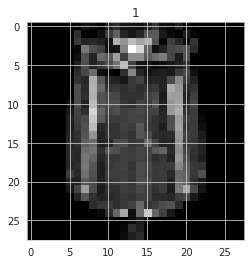

In [0]:
# Let's view some images!
i = random.randint(1,60000) # select any random index from 1 to 60,000
plt.imshow(train[i,2:].reshape((28,28)))

plt.imshow(train[i,2:].reshape((28,28)) , cmap = 'gray') # reshape and plot the image
label_index = fashion_train_df.iloc[:,1][i]
plt.title(label_index)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train[:, 2:], train[:, 1], test_size = 0.0005, random_state = 42)

In [0]:
# Prepare the training and testing dataset 
X_train = X_train/ 255
# y_train = keras.utils.to_categorical(y_train, 5)

X_test = X_test/ 255
fashion_test = fashion_test[:,1:]
fashion_test = fashion_test/255
print(fashion_test[1])

[0.         0.         0.         0.         0.         0.00392157
 0.         0.         0.         0.         0.16078432 0.7372549
 0.40392157 0.21176471 0.1882353  0.16862746 0.34117648 0.65882355
 0.52156866 0.0627451  0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.00392157 0.         0.         0.         0.19215687
 0.53333336 0.85882354 0.84705883 0.89411765 0.9254902  1.
 1.         1.         1.         0.8509804  0.84313726 0.99607843
 0.90588236 0.627451   0.1764706  0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.05490196 0.6901961  0.87058824 0.8784314  0.83137256
 0.79607844 0.7764706  0.76862746 0.78431374 0.84313726 0.8
 0.7921569  0.7882353  0.7882353  0.7882353  0.81960785 0.85490197
 0.8784314  0.6431373  0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.7372549
 0.85882354 0.78431374 0.7764706  0.7921569  0.77647

In [0]:
print(X_train.shape)
print(y_train.shape)

(59970, 784)
(59970,)


In [0]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.0051, random_state = 42)
print(X_train.shape)
print(y_train.shape)

(59664, 784)
(59664,)


In [0]:
# * unpack the tuple
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))
fashion_test = fashion_test.reshape(fashion_test.shape[0],*(28, 28, 1))
print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)

print(fashion_test[1])

(59664, 28, 28, 1)
(59664,)
(306, 28, 28, 1)
[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.00392157]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.16078432]
  [0.7372549 ]
  [0.40392157]
  [0.21176471]
  [0.1882353 ]
  [0.16862746]
  [0.34117648]
  [0.65882355]
  [0.52156866]
  [0.0627451 ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.00392157]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.19215687]
  [0.53333336]
  [0.85882354]
  [0.84705883]
  [0.89411765]
  [0.9254902 ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [0.8509804 ]
  [0.84313726]
  [0.99607843]
  [0.90588236]
  [0.627451  ]
  [0.1764706 ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.05490196]
  [0.6901961 ]
  [0.8

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard


In [0]:
cnn_model = Sequential()

# Try 32 fliters first then 64
cnn_model.add(Conv2D(32, (6, 6), input_shape = (28,28,1), activation='relu',strides=(1, 1),padding="same"))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.2))

cnn_model.add(Conv2D(64, (7, 7), input_shape = (28,28,1), activation='relu',strides=(1, 1),padding="same"))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.2))

cnn_model.add(Conv2D(128, (8, 8), input_shape = (28,28,1), activation='relu',strides=(1, 1),padding="same"))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.35))


# cnn_model.add(Conv2D(32,3, 3, activation='relu'))
# cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Flatten())
cnn_model.add(Dense(units = 4096, activation = 'relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(units = 5, activation = 'softmax'))



In [0]:
# Compile the model
# model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr = 0.00001),metrics =['accuracy'])

import time
time_start = time.time()
epochs = 551
history = cnn_model.fit(X_train, y_train, batch_size = 512, epochs = epochs,verbose = 1)
                        # verbose = 1, validation_data = (X_validate, y_validate))
time_end = time.time()
print("time taken for training CNN for all samples is  {0}".format(time_end -time_start))

In [0]:
evaluation = cnn_model.evaluate(X_test, y_test)
print(f'Test Accuracy : {evaluation[1]:.3f}')


In [0]:
predictions = cnn_model.predict_classes(X_test)
f1_s = f1_score(y_test, predictions,average='macro')
# f1score.append(f1_s)
print("F1 score when lr = {0} and epochs = {1} is {2}".format(0.00001,epochs,f1_s))
cnnpred = cnn_model.predict_proba(X_test)
lg_loss = log_loss(y_test,cnnpred) 
# logloss.append("Logarithm loss when depth ="+ str(x) + " and trees = " + str(y) + " is : " + str(lg_loss))
print("Logarithm loss when lr = {0} and epochs = {1} is {2}".format(0.00001,epochs,lg_loss))
print(confusion_matrix(y_test,predictions))

F1 score when lr = 1e-05 and epochs = 551 is 0.884
Logarithm loss when lr = 1e-05 and epochs = 551 is 0.28420143264096065
[[574  12   4   0   0]
 [ 53 547  17   6   2]
 [  3  55 479  16   6]
 [  0   7  76 503  16]
 [  1   0   9  65 549]]


600/600 [==============================] - 0s 175us/step
Test Accuracy : 0.925

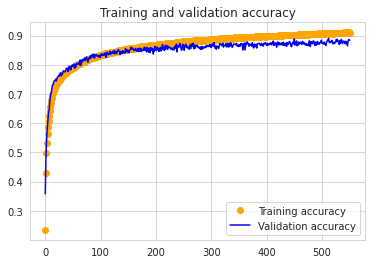

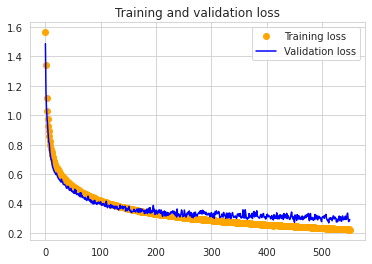

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy',color='orange')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy',)
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss',color='orange')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
predicted_classes = cnn_model.predict_classes(fashion_test)


In [0]:
predicted_classes.shape
print(predicted_classes)
# np.argmax(predicted_classes[6])

[3 4 1 ... 3 2 2]


In [0]:
my_submission = pd.DataFrame({'Id': fashion_test_df.Id, 'Label': predicted_classes})
# # # you could use any filename. We choose submission here
my_submission.to_csv('CNN_submission very big filter', index=False)

# **ResNet Part**

In [0]:
from __future__ import print_function
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import MaxPooling2D, AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
%matplotlib inline
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

Using TensorFlow backend.


In [0]:
from google.colab import files
import io
uploaded = files.upload()

!pip install -q kaggle

# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

# Next, install the Kaggle API client.
!pip install -q kaggle

# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c ece-657a-w20-asg3-part-1
!unzip train.csv.zip
!unzip testX.csv.zip

In [0]:
data_raw = pd.read_csv('train.csv')
# data_raw.head()

# selecting only required number of observations
data_sample = data_raw.iloc[0:60000]
data = data_sample.iloc[:,2:]
labels = data_sample.iloc[:,1]
# print(data.shape)
# print(data.head())
# print(labels.shape)

testX = pd.read_csv('testX.csv')
testX.head()
test = testX.iloc[:,1:]
# print(test.shape)
# test.head()

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('testX.csv')

train = train_data.iloc[:,2:].values
Y_train = train_data.iloc[:,1]

X_train,X_test,Y_train,Y_test=train_test_split(train[0:60000],labels[0:60000],test_size=0.01,random_state=42)



X_train,X_val,Y_train,Y_val=train_test_split(X_train,Y_train,test_size=0.002,random_state=42)


test = test_data.iloc[:,1:]
# Y_test = test_data.label.values

print(X_test.shape, X_train.shape,X_val.shape)
print(X_test.shape, X_train.shape,X_val.shape)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

(600, 784) (59281, 784) (119, 784)
(600, 784) (59281, 784) (119, 784)


In [0]:
#Defining constants
epochs = 25
batch_size = 1000
data_augmentation = False
img_size = 28

num_classes = 5
num_filters = 64
num_blocks = 4
num_sub_blocks = 2
use_max_pool = False

In [0]:
x_train = X_train.reshape(X_train.shape[0],img_size,img_size,1)
x_val = X_val.reshape(X_val.shape[0],img_size,img_size,1)
x_test = X_test.reshape(X_test.shape[0],img_size,img_size,1)
test = np.array(test)
test = test.reshape(test.shape[0],img_size,img_size,1)
input_size = (img_size, img_size,1)
# Normalize data.
x_train = x_train.astype('float32') / 255
x_val = x_val.astype('float32') / 255
x_test = x_test.astype('float32') / 255
test = np.array(test)
test = test.reshape(test.shape[0],img_size,img_size,1)
test = test.astype('float32')/255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('Y_train shape:', Y_train.shape)

x_train shape: (59281, 28, 28, 1)
59281 train samples
600 test samples
Y_train shape: (59281,)


In [0]:
# Converting labels to one-hot vectors
y_train = keras.utils.to_categorical(Y_train, num_classes)
y_val = keras.utils.to_categorical(Y_val,num_classes)
y_test = keras.utils.to_categorical(Y_test,num_classes)

In [0]:
# gpu_options = tf.GPUOptions(allow_growth=True)
# session = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))

In [0]:
#Creating model based on ResNet published archietecture
inputs = Input(shape=input_size)
x = Conv2D(num_filters, padding='same', 
           kernel_initializer='he_normal', 
           kernel_size=7, strides=2,
           kernel_regularizer=l2(1e-4))(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)

#Check by applying max pooling later (setting it false as size of image is small i.e. 28x28)
if use_max_pool:
    x = MaxPooling2D(pool_size=3,padding='same', strides=2)(x)
    num_blocks =3
#Creating Conv base stack 

# Instantiate convolutional base (stack of blocks).
for i in range(num_blocks):
    for j in range(num_sub_blocks):
        strides = 1
        is_first_layer_but_not_first_block = j == 0 and i > 0
        if is_first_layer_but_not_first_block:
            strides = 2
        #Creating residual mapping using y
        y = Conv2D(num_filters,kernel_size=3,padding='same',strides=strides,
                   kernel_initializer='he_normal',kernel_regularizer=l2(1e-4))(x)
        y = BatchNormalization()(y)
        y = Activation('relu')(y)
        y = Conv2D(num_filters,kernel_size=3,padding='same',
                   kernel_initializer='he_normal',kernel_regularizer=l2(1e-4))(y)
        y = BatchNormalization()(y)
        if is_first_layer_but_not_first_block:
            x = Conv2D(num_filters,kernel_size=1,padding='same',strides=2,
                       kernel_initializer='he_normal',kernel_regularizer=l2(1e-4))(x)
        #Adding back residual mapping
        x = keras.layers.add([x, y])
        x = Activation('relu')(x)

    num_filters = 2 * num_filters

# Add classifier on top.
x = AveragePooling2D()(x)
y = Flatten()(x)
outputs = Dense(num_classes,activation='softmax',kernel_initializer='he_normal')(y)

# Instantiate and compile model.
model = Model(inputs=inputs, outputs=outputs)
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.00001),metrics=['accuracy'])
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_41 (Conv2D)              (None, 14, 14, 64)   3200        input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_35 (BatchNo (None, 14, 14, 64)   256         conv2d_41[0][0]                  
__________________________________________________________________________________________________
activation_35 (Activation)      (None, 14, 14, 64)   0           batch_normalization_35[0][0]     
____________________________________________________________________________________________

In [0]:
import time
time_start = time.time()
history=model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs= epochs,
              validation_data=(x_val, y_val),
              shuffle=True,
          verbose = 1)
time_end = time.time()
print("time taken for training ResNet for epochs = 10 is  {0}".format(time_end -time_start))

Train on 47520 samples, validate on 11880 samples
Epoch 1/40
47520/47520 [==============================] - 14s 304us/step - loss: 2.3850 - accuracy: 0.4717 - val_loss: 2.2969 - val_accuracy: 0.3821
Epoch 2/40
47520/47520 [==============================] - 10s 219us/step - loss: 1.7167 - accuracy: 0.6881 - val_loss: 1.9392 - val_accuracy: 0.5790
Epoch 3/40
47520/47520 [==============================] - 10s 219us/step - loss: 1.5921 - accuracy: 0.7449 - val_loss: 1.7560 - val_accuracy: 0.6814
Epoch 4/40
47520/47520 [==============================] - 10s 220us/step - loss: 1.5171 - accuracy: 0.7773 - val_loss: 1.6428 - val_accuracy: 0.7264
Epoch 5/40
47520/47520 [==============================] - 10s 219us/step - loss: 1.4628 - accuracy: 0.8025 - val_loss: 1.5567 - val_accuracy: 0.7628
Epoch 6/40
47520/47520 [==============================] - 10s 219us/step - loss: 1.4204 - accuracy: 0.8205 - val_loss: 1.5006 - val_accuracy: 0.7820
Epoch 7/40
47520/47520 [==============================] 

In [0]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
pred = model.predict(x_test)
pred_classes = np.argmax(pred,axis=-1)
f1_s = f1_score(Y_test, pred_classes,average='micro')
# f1score.append(f1_s)
print("F1 score when lr = {0} and epochs = {1} is {2}".format(0.01,10,f1_s))
# cnnpred = model.predict_proba(x_test)
# lg_loss = log_loss(Y_test,cnnpred) 
# logloss.append("Logarithm loss when depth ="+ str(x) + " and trees = " + str(y) + " is : " + str(lg_loss))
# print("Logarithm loss when lr = {0} and epochs = {1} is {2}".format(0.00001,epochs,lg_loss))
print(confusion_matrix(Y_test,pred_classes))

600/600 [==============================] - 0s 294us/step
Test loss: 1.4609185727437337
Test accuracy: 0.8349999785423279
F1 score when lr = 0.01 and epochs = 10 is 0.835
[[111   5   3   0   0]
 [ 11 101  14   1   0]
 [  2   9  84  10   1]
 [  0   1  19  84   7]
 [  0   0   2  14 121]]


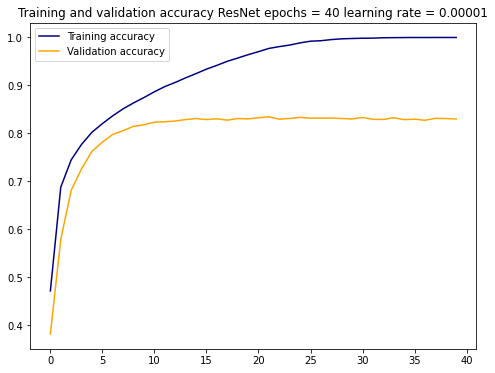

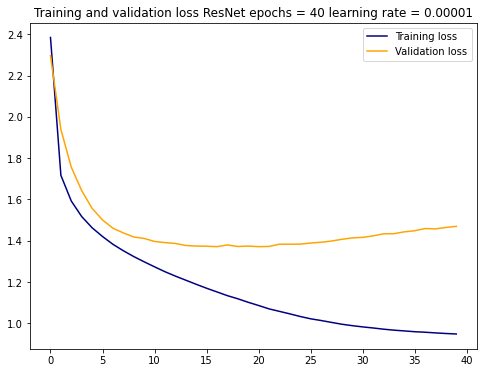

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.figure(figsize=(8,6))
plt.plot(epochs, accuracy, 'b', label='Training accuracy',color='navy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy',color='orange')
plt.title('Training and validation accuracy ResNet epochs = 40 learning rate = 0.00001')
plt.legend()
plt.figure(figsize=(8,6))
plt.plot(epochs, loss, 'b', label='Training loss',color='navy')
plt.plot(epochs, val_loss, 'b', label='Validation loss',color='orange')
plt.title('Training and validation loss ResNet epochs = 40 learning rate = 0.00001')
plt.legend()
plt.show()

In [0]:
import time
time_start = time.time()
history=model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs= epochs,
              # validation_data=(x_val, y_val),
              shuffle=True,
          verbose = 1)
time_end = time.time()
print("time taken for training ResNet for epochs = 25 for all data is  {0}".format(time_end -time_start))

Epoch 1/25
59281/59281 [==============================] - 16s 273us/step - loss: 2.2250 - accuracy: 0.5281
Epoch 2/25
59281/59281 [==============================] - 12s 205us/step - loss: 1.6610 - accuracy: 0.7143
Epoch 3/25
59281/59281 [==============================] - 12s 205us/step - loss: 1.5416 - accuracy: 0.7689
Epoch 4/25
59281/59281 [==============================] - 12s 205us/step - loss: 1.4710 - accuracy: 0.7984
Epoch 5/25
59281/59281 [==============================] - 12s 205us/step - loss: 1.4203 - accuracy: 0.8207
Epoch 6/25
59281/59281 [==============================] - 12s 205us/step - loss: 1.3795 - accuracy: 0.8377
Epoch 7/25
59281/59281 [==============================] - 12s 205us/step - loss: 1.3450 - accuracy: 0.8516
Epoch 8/25
59281/59281 [==============================] - 12s 205us/step - loss: 1.3152 - accuracy: 0.8646
Epoch 9/25
59281/59281 [==============================] - 12s 205us/step - loss: 1.2886 - accuracy: 0.8765
Epoch 10/25
59281/59281 [============

In [0]:
time_start = time.time()
predicted_classes = model.predict(test)
# predict(test)
time_end = time.time()
print("time taken for predicting ResNet is  {0}".format(time_end -time_start))


time taken for predicting ResNet is  2.266979694366455


In [0]:
predicted_classes.shape
# print(np.argmax(predicted_classes[0:15]))
# np.argmax(predicted_classes[6])

(10000, 5)

In [0]:
print(np.argmax(predicted_classes[0]))

4


In [0]:
predicted_classes = np.argmax(predicted_classes,axis=-1)
# print(predicted_classes)



In [0]:
print(predicted_classes)

[4 4 1 ... 3 2 2]


In [0]:
my_submission = pd.DataFrame({'Id': testX.Id, 'Label': predicted_classes})
# # # you could use any filename. We choose submission here
my_submission.to_csv('ResNet all train.csv', index=False)